# Part -1 (class work) : Text Pre-processing in NLP.

# Basics of Text Data Cleaning.
## Instructions and Requirements:

In this Notebook we will evaluate few basic text data cleaning techniques which are modt for any NLP tasks.

This Notebook make uses of "NLTK" and "Regex" Library a lot.

Dataset: "trump_tweets.csv"

This week workshop will have two sections:

To DO:

Do - 1 - Read the code provided, understand there usages and Complete Exercise-1, which is at bottom.


Do - 2 - Based on your implementations Demonstrate the importance of Text pre - processing in NLP (one per group).





## Time to Complete- 90 mins.

The first step in any Natural Language Processing task is to pre-process the text dataset. The main goal of this step is to remove noise from the data. The noise in text data can be in different form, so in this section we will look into some common datacleaning task performed before any NLP task.


 Terminology Alert!!!
*   Document: A distinct unit of text. This could be a sentence, paragraph or an artice.

  Example:

1. doc1==> "How are you?"
2. doc2==> "I go to school."
*   Corpus: collection of documents.

Example: corpus=[doc1, doc2]


### Read the data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/trumptweets_small.csv')

In [ ]:
df_text=df[['content']]

In [ ]:
df_text.dropna()

,content
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower..."
...,...
41117,I have never seen the Republican Party as Stro...
41118,Now Mini Mike Bloomberg is critical of Jack Wi...
41119,I was thrilled to be back in the Great State o...
41120,"“In the House, the President got less due proc..."


## Removing Unwanted Text.

### Remove URLS:

In this step we will try to remove URLs.

In [ ]:
import re
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)


In [ ]:
text = " Click on this link to open facebook https://www.facebook.com/"
text_url = remove_urls(text)

In [ ]:
text_url

' Click on this link to open facebook '

In [ ]:
text_no_url = df_text["content"].apply(remove_urls)


### Remove Unwanted Characters.

This may be punctuatuion, numbers, emoji, dates etc.

[ It depends on dataset and task we are performing. For example, The dataset we are using is scraped from twitter- Thus we will also try to remove @tag and #mentions  from the dataset.]



sample = "Hello @gabe_flomo 👋🏾, still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱

### Remove Emojis:


In [ ]:
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [ ]:
test_string = "Hello @siman 👋🏾, still on up for the movie???  #MovieNight #friday #🍱"
no_emoji = remove_emoji(test_string)
no_emoji

'Hello @siman  , still on up for the movie???  #MovieNight #friday # '

### Remove Everyunwanted characters:

We will try to compile everything into one single function to remove everthings.

In [ ]:
def removeunwanted_characters(document):
  """
  This function will remove all the unwanted characters from the input dataset.
  Input Args:
  documet: A text data to be cleaned.
  Return:
  A cleaned document.
  """
  # remove user mentions
  document = re.sub("@[A-Za-z0-9_]+"," ", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  #remove emojis
  document = remove_emoji(document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()

In [ ]:
# Test:
cleaned_string = removeunwanted_characters(test_string)
cleaned_string


'Hellostill on up for the movie'

In [ ]:
text_removed_unwanted = df_text["content"].apply(removeunwanted_characters)


### Tokenizations:

Example:

IN:

"He did not try to navigate after the first bold flight, for the reaction had taken something out of his soul."

OUT:

['He', 'did', 'not', 'try', 'to', 'navigate', 'after', 'the', 'first', 'bold', 'flight', ',', 'for', 'the', 'reaction', 'had', 'taken', 'something', 'out', 'of', 'his', 'soul', '.']

We will be using NLTK library to perform tokenizations.


In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Test case:
IN = "He did not try to navigate after the first bold flight, for the reaction had taken something out of his soul."
OUT = word_tokenize(IN)
OUT

['He',
 'did',
 'not',
 'try',
 'to',
 'navigate',
 'after',
 'the',
 'first',
 'bold',
 'flight',
 ',',
 'for',
 'the',
 'reaction',
 'had',
 'taken',
 'something',
 'out',
 'of',
 'his',
 'soul',
 '.']

### Remove Punctutations:


In [ ]:
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
  """
  This function removes the punctutations present in our text data.
  Input Args:
  text: text data.
  Returns:
  text: cleaned text.
  """
  tokenizer = RegexpTokenizer(r"\w+")
  lst=tokenizer.tokenize(' '.join(text))
  return lst


In [ ]:
#Test
text_punctutation = "He did not try to navigate: after the!!!! first bold flight, for,,,,, the reaction!!!!had taken??????? something out of his soul."
text_punc_token = word_tokenize(text_punctutation)
print(text_punctutation)
print("+++++++++++++++++_____________________+++++++++++++++++++++")
print(text_punc_token)
print("_____________________+++++++++++++++++++++++++++__________________")
text_clean = remove_punct(text_punc_token)
print(text_clean)

He did not try to navigate: after the!!!! first bold flight, for,,,,, the reaction!!!!had taken??????? something out of his soul.
+++++++++++++++++_____________________+++++++++++++++++++++
['He', 'did', 'not', 'try', 'to', 'navigate', ':', 'after', 'the', '!', '!', '!', '!', 'first', 'bold', 'flight', ',', 'for', ',', ',', ',', ',', ',', 'the', 'reaction', '!', '!', '!', '!', 'had', 'taken', '?', '?', '?', '?', '?', '?', '?', 'something', 'out', 'of', 'his', 'soul', '.']
_____________________+++++++++++++++++++++++++++__________________
['He', 'did', 'not', 'try', 'to', 'navigate', 'after', 'the', 'first', 'bold', 'flight', 'for', 'the', 'reaction', 'had', 'taken', 'something', 'out', 'of', 'his', 'soul']


### Remove StopWord:

A majority of the words in a given text are connecting parts of a sentence rather than showing subjects, objects or intent. Word like “the” or “and” cab be removed by comparing text to a list of stopword provided by the NLTK library.

We can also define stopwords as required by our task and dataset requirement.



In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def remove_stopwords(text_tokens):
  """
  This function removes all the stopwords present in out text tokens.
  Input Args:
  text_tokens: tokenize input of our datasets.
  Returns:
  result_tokens: list of token without stopword.
  """

  result_tokens = []
  for token in text_tokens:
    if token not in stop_words:
       result_tokens.append(token)
  return result_tokens

In [ ]:
test_inputs = ['He', 'did', 'not', 'try', 'to', 'navigate', 'after', 'the', 'first', 'bold', 'flight', ',', 'for', 'the', 'reaction', 'had', 'taken', 'something', 'out', 'of', 'his', 'soul', '.']
print(test_inputs)
tokens_without_stopwords = remove_stopwords(test_inputs)
print(tokens_without_stopwords)

['He', 'did', 'not', 'try', 'to', 'navigate', 'after', 'the', 'first', 'bold', 'flight', ',', 'for', 'the', 'reaction', 'had', 'taken', 'something', 'out', 'of', 'his', 'soul', '.']
['He', 'try', 'navigate', 'first', 'bold', 'flight', ',', 'reaction', 'taken', 'something', 'soul', '.']


## Text Normalization:

This is the idea of reducing number of words present in Corpus by the process of Lemmatization, Stemming, Capital to Lower [i.e. My -- my].


### Lemmatization:

It is an common NLP techniques used to reduce number of tokens(words) in dataset, this is acheived by replacing the word with its root words.

Example:


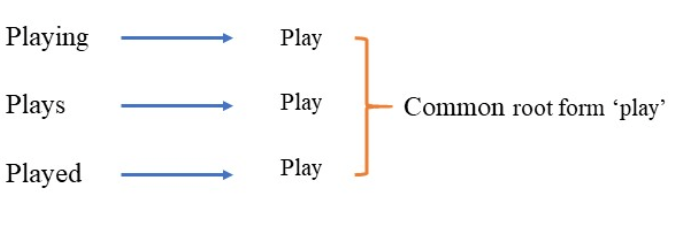

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
  """
  This function performs the lemmatization operations as explained above.
  Input Args:
  token_text: list of tokens.
  Returns:
  lemmatized_tokens: list of lemmatized tokens.
  """
  lemma_tokens = []
  wordnet = WordNetLemmatizer()
  lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]

  return lemmatized_tokens




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemmatization("Should we go walking or swimming".split())

['Should', 'we', 'go', 'walk', 'or', 'swim']

### Stemming:

Also a token(word) reduction techniques. This techniques tries to reduce by chopping off a part of the word at the tail end.


### Stemming Vs. Lemmatization.
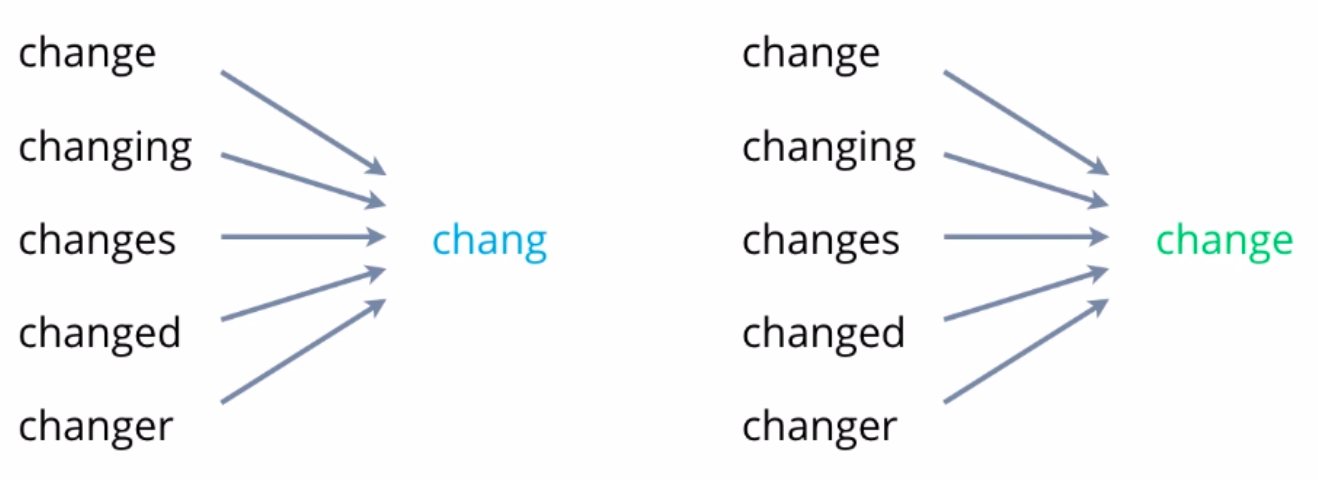

In [ ]:
from nltk.stem import PorterStemmer

def stemming(text):
  """
  This function performs stemming operations.
  Input Args:
  token_text: list of tokenize text.
  Returns:
  stemm_tokes: list of stemmed tokens.
  """
  porter = PorterStemmer()
  stemm_tokens = []
  for word in text:
    stemm_tokens.append(porter.stem(word))
  return stemm_tokens

In [ ]:
#Test
print("+++++++++++++++++++++++++++++++" "INPUT TOKENS" "++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
token_text_test=['Connects','Connecting','Connections','Connected','Connection','Connectings','Connect']
print(token_text_test)
print("++++++++++++++++++" "LEMMATIZED TOKENS" "+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
lemma_tokens = lemmatization(token_text_test)
print(lemma_tokens)
print("+++++++++++++++++++++" "STEMMED TOKENS" "+++++++++++++++++++++++++++++++++++++")
stemmed_tokens = stemming(token_text_test)
print(stemmed_tokens)


+++++++++++++++++++++++++++++++INPUT TOKENS++++++++++++++++++++++++++++++++++++++++++++++++++++++++
['Connects', 'Connecting', 'Connections', 'Connected', 'Connection', 'Connectings', 'Connect']
++++++++++++++++++LEMMATIZED TOKENS+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
['Connects', 'Connecting', 'Connections', 'Connected', 'Connection', 'Connectings', 'Connect']
+++++++++++++++++++++STEMMED TOKENS+++++++++++++++++++++++++++++++++++++
['connect', 'connect', 'connect', 'connect', 'connect', 'connect', 'connect']


### Lower order:


In [ ]:
def lower_order(text):
  """
  This function converts all the text in input text to lower order.
  Input Args:
  token_text : input text.
  Returns:
  small_order_text : text converted to small/lower order.
  """
  small_order_text = text.lower()
  return small_order_text

# Test:
sample_text = "This Is some Normalized TEXT"
sample_small = lower_order(sample_text)
print(sample_small)


this is some normalized text


## Create Input Text Pipeline

We will compile every basic cleaning steps in following one functions and implement with our datasets.

### Exercise-1:
Read the provided data "trump_tweets.csv" and complete the followiing compilin function.


Read data:

In [ ]:
data = pd.read_csv("/content/trum_tweet_sentiment_analysis.csv", encoding="ISO-8859-1")
data.head()

,text,Sentiment
0,RT @JohnLeguizamo: #trump not draining swamp b...,0
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,0
2,Trump protests: LGBTQ rally in New York https:...,1
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",0
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,0


In [ ]:
data_cleaning = data["text"].dropna()

In [ ]:
data_cleaning[0]

'RT @JohnLeguizamo: #trump not draining swamp but our taxpayer dollars on his trips to advertise his properties! @realDonaldTrumpÂ\x85 https://t.co/gFBvUkMX9z'

In [ ]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  """
  This...
  """
  data = dataset
  # Convert the input to small/lower order.
  data = lower_order(data)
  # Remove URLs
  data = remove_urls(data)
  # Remove emojis
  data = remove_emoji(data)
  # Remove all other unwanted characters.
  data = removeunwanted_characters(data)
  # Create tokens.
  tokens = data.split()
  # Remove stopwords:
  tokens = remove_stopwords(tokens)
  if rule == "lemmatize":
    tokens =  lemmatization(tokens)
  elif rule == "stem":
    tokens = stemming(tokens)
  else:
    print("Pick between lemmatize or stem")


  return " ".join(tokens)


In [ ]:
sample = "Hello @gabe_flomo 👋🏾, I still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱"
print(text_cleaning_pipeline(sample))

hello still want us hit new sushi spot lmk youre free cuz cant go next weekend since ill swim


In [ ]:
test = data["text"][0]

In [ ]:
print(text_cleaning_pipeline(test))

rtnot drain swamp taxpayer dollars trip advertise properties


In [ ]:
cleaned_tokens = data["text"].apply(lambda dataset: text_cleaning_pipeline(dataset))


In [ ]:
cleaned_tokens[0]

'rtnot drain swamp taxpayer dollars trip advertise properties'